# Basic usage: Music Audio Tagging

In the following lines, you will learn how to use our motel to automatically tag your music.

In [1]:
import numpy as np
from musically_motivated_CNN import musiCNN
file_name = './audio/joram-moments_of_clarity-08-solipsism-59-88.mp3'
taggram, tags = musiCNN.predict(file_name, model='MTT')

Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..


100%|██████████| 8/8 [00:00<00:00, 18.15it/s]


In [2]:
topN = 3
tags_likelihood_mean = np.mean(taggram, axis=0)
for tag_index in tags_likelihood_mean.argsort()[-topN:][::-1]:
    print(' - ' + tags[tag_index])

 - techno
 - electronic
 - synth


Do you agree? Listen to the music clip!

In [3]:
import IPython.display as ipd
ipd.Audio(file_name)

## How did you do it?

Out of `musiCNN.predict()`, you get a taggram and its associated tags. 

You can see the **taggram** in the following figure:

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
in_length = 3 # seconds (by default, the model takes inputs of 3 seconds with no overlap)

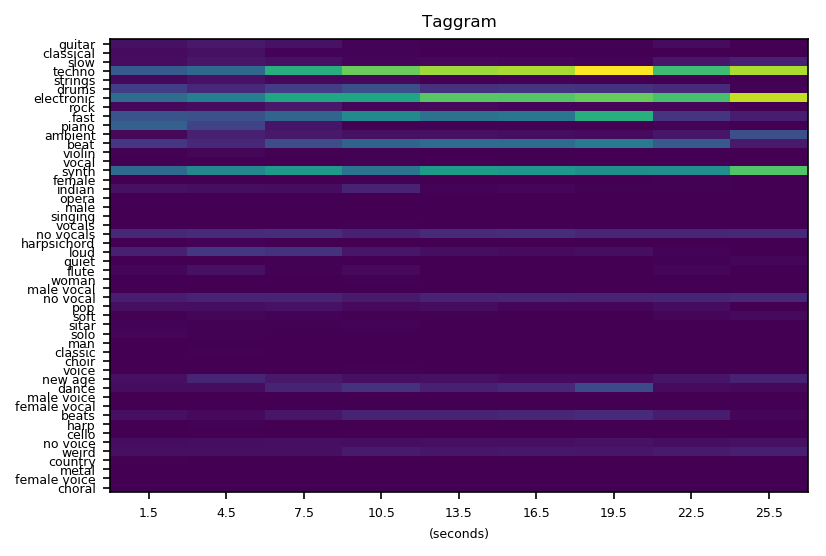

In [6]:
plt.rcParams['figure.dpi'] = 150 # make it big: to properlly visualize the figure
fig, ax = plt.subplots()
ax.title.set_text('Taggram')
ax.title.set_fontsize(8)
ax.imshow(taggram.T, interpolation=None, aspect="auto")
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=6)
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=6)
ax.set_xlabel('(seconds)', fontsize=6)
plt.show()

From the taggram, we can compute the **song-level likelihood of the tags** (by simply averaging through time):

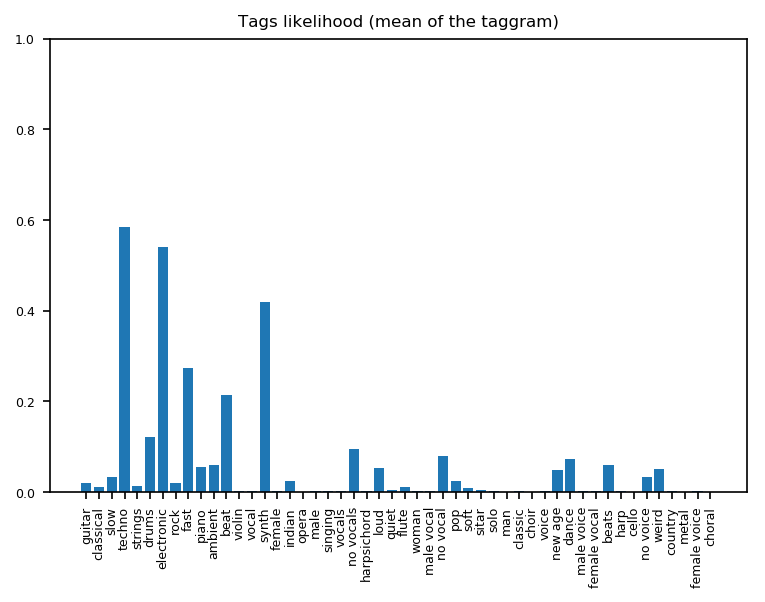

In [7]:
plt.rcParams['figure.dpi'] = 150 # make it big: to properlly visualize the figure
tags_likelihood_mean = np.mean(taggram, axis=0)

fig, ax = plt.subplots()
ax.title.set_text('Tags likelihood (mean of the taggram)')
ax.title.set_fontsize(8)
ax.set_ylim((0, 1))
ax.tick_params(axis="y", labelsize=6)
ax.tick_params(axis="x", labelsize=6)
pos = np.arange(len(tags))
ax.bar(pos, tags_likelihood_mean)
ax.set_xticks(pos)
ax.set_xticklabels(tags, rotation=90)
plt.show()

From the above tags likelihood, we can compute the **top3 tags** (that we have empirically found to be generally correct):

In [13]:
topN = 3
for tag_index in tags_likelihood_mean.argsort()[-topN:][::-1]:
    print(' - ' + tags[tag_index])

 - techno
 - electronic
 - synth


# Advanced usage: Music Feature Extractor